## "Cirugía de datos"

Es el proceso de transformar y mapear datos de un dataset raw (en bruto) en otro formato con la intención de hacerlo más apropiado y valioso para una variedad de propósitos posteriores, como el análisis.

Este proceso puede incluir visualización de datos, agregación de datos, entrenamiento de un modelo estadístico, así como muchos otros usos potenciales.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Seleccionar "n" columnas para un nuevo subset

In [4]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [5]:
columnas_deseadas = ['Account Length', 'Phone', 'Eve Charge']
subset = data[columnas_deseadas]
subset.head()

,Account Length,Phone,Eve Charge
0,128,382-4657,16.78
1,107,371-7191,16.62
2,137,358-1921,10.30
3,84,375-9999,5.26
4,75,330-6626,12.61


In [6]:
#Obtener las columnas deseadas, cuando las que no se quieren son pocas
columnas_no_deseadas = ['Account Leght', 'Vmail Message', 'Day Calls']
all_columnas = data.columns.values.tolist()

#Obtener todas las columnas que se quieren
sublist = [x for x in all_columnas if x not in columnas_no_deseadas]

subset2 = data[sublist]
subset2

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [7]:
#De forma alternativa, se puede hacer la diferencias por conjuntos

a = set(columnas_no_deseadas)
b = set(all_columnas)
sublist2 = list(b - a)
subset3 = data[sublist2]
subset3

,VMail Message,Account Length,Area Code,Phone,Intl Charge,Eve Charge,Night Charge,Day Charge,VMail Plan,Night Calls,Intl Mins,Eve Calls,Night Mins,Int'l Plan,Eve Mins,State,Intl Calls,CustServ Calls,Day Mins,Churn?
0,25,128,415,382-4657,2.70,16.78,11.01,45.07,yes,91,10.0,99,244.7,no,197.4,KS,3,1,265.1,False.
1,26,107,415,371-7191,3.70,16.62,11.45,27.47,yes,103,13.7,103,254.4,no,195.5,OH,3,1,161.6,False.
2,0,137,415,358-1921,3.29,10.30,7.32,41.38,no,104,12.2,110,162.6,no,121.2,NJ,5,0,243.4,False.
3,0,84,408,375-9999,1.78,5.26,8.86,50.90,no,89,6.6,88,196.9,yes,61.9,OH,7,2,299.4,False.
4,0,75,415,330-6626,2.73,12.61,8.41,28.34,no,121,10.1,122,186.9,yes,148.3,OK,3,3,166.7,False.
5,0,118,510,391-8027,1.70,18.75,9.18,37.98,no,118,6.3,101,203.9,yes,220.6,AL,6,0,223.4,False.
6,24,121,510,355-9993,2.03,29.62,9.57,37.09,yes,118,7.5,108,212.6,no,348.5,MA,7,3,218.2,False.
7,0,147,415,329-9001,1.92,8.76,9.53,26.69,no,96,7.1,94,211.8,yes,103.1,MO,6,0,157.0,False.
8,0,117,408,335-4719,2.35,29.89,9.71,31.37,no,90,8.7,80,215.8,no,351.6,LA,4,1,184.5,False.
9,37,141,415,330-8173,3.02,18.87,14.69,43.96,yes,97,11.2,111,326.4,yes,222.0,WV,5,0,258.6,False.


### Seleccionar "n" filas para un nuevo subset

In [8]:
# Se considera del límite inferior hasta 1 menos del límite superior del rango en el corchete
data[10:14]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
11,RI,74,415,344-9403,no,no,0,187.7,127,31.91,...,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False.
12,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False.
13,MT,95,510,394-8006,no,no,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,False.


In [9]:
# Desde una fila en adelante

data[3330:]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False.


In [10]:
# Hasta una fila hacia atráz

data[:8]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.


In [11]:
# Usuarios con Day Mins > 300

data1 = data[data['Day Mins'] > 300]
data1.shape

(43, 21)

In [12]:
# Usuarios de Nueva York (State = 'NY')
data2 = data[data['State'] == 'NY']
data2.shape

(83, 21)

In [13]:
# Más de una condición a cumplir
# AND -> &
# Buscamos los usuarios que cumplan con 2 condiciones, que hablen más de 300 minutos y sean de New York
data3 = data[(data['Day Mins'] > 300) & (data['State'] == 'NY')]
data3.shape


(2, 21)

Interesante, sólo dos usuarios!!!

¿Qué ocurre si cambiamos la condición por un "OR"? Pues bien, deberíamos tener un conjunto más grande de datos

In [14]:
# Más de una condición a cumplir
# OR -> |
# Buscamos los usuarios que cumplan con; que hablen más de 300 minutos ó bien que sean de New York

data4 = data[(data['Day Mins'] > 300) | (data['State'] == 'NY')]
data4.shape

(124, 21)

¿Se puede obtener un subset donde se combinen condiciones sobre filas y columnas?
La respuesta es sí, vamos a por ello!

## Subconjuntos con loc e iloc y creación de nuevas columnas

Se pide obtener los valores de los 50 primeros individuos con respecto a minutos del día, de noche y longitud de la cuenta

In [15]:
# Primera forma

subset_first_50 = data[['Day Mins', 'Night Mins', 'Account Length']][:50]
subset_first_50.head()

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75


In [16]:
# Segunda forma, con iloc

data.iloc[1:10, 3:6] # Las filas entre la 1 a la 10, y las columnas en las posiciones 3 a la 6 (la 6 sin incluir)

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [17]:
#Más ejemplos
data.iloc[:, 3:6] # Todas las filas para las columnas de la 3 a la 6
data.iloc[1:10, :] # Todas las columnas, para los registros del 1 al 10

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [18]:
# Usando loc, para ingresar los nombres de las columnas

data.loc[:10, ['Day Mins', 'Night Mins', 'Account Length']]

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75
5,223.4,203.9,118
6,218.2,212.6,121
7,157.0,211.8,147
8,184.5,215.8,117
9,258.6,326.4,141


Crear una nueva columna


In [19]:
# Aquí un ejemplo para agregar una columna con los minutos totales 

data['Total Mins'] = data['Day Mins'] + data['Night Mins'] + data['Eve Mins']
data['Total Mins'].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

In [20]:
# Otro ejemplo para agregar una columna con las llamadas totales 
data['Total Calls'] = data['Day Calls'] + data['Night Calls'] + data['Eve Calls']
data['Total Calls'].head()

0    300
1    329
2    328
3    248
4    356
Name: Total Calls, dtype: int64

In [21]:
data.shape

(3333, 23)

In [22]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Total Mins,Total Calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,False.,707.2,300
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,False.,611.5,329
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,False.,527.2,328
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,False.,558.2,248
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,False.,501.9,356


Podemos evidenciar que creamos las dos columnas al final de nuestro dataframe

## Generación aleatoria de números

In [23]:
#Generar 10 números aleatorios con random
i=0
while i < 10:
    print(np.random.randint(1,100))
    i+=1

1
21
34
47
37
91
98
2
31
71


In [24]:
## La forma más clásica de generar un número aleatorio es entre 0 y 1. 
## Se generan 10 números
i=0
while i < 10:
    print(np.random.random())
    i+=1

0.3792106797823498
0.39990153763983916
0.08558157363440766
0.8286610276578852
0.5429550987016851
0.47842378849684064
0.2422158395336389
0.0879273909248035
0.5279648605320951
0.4162943419136004


In [25]:
## Existe una librería que genera una lista de número de forma aleatoria dentro de un rango

import random

# Imprimir 10 números

for i in range(10):
    print(random.randrange(1, 100))

18
13
17
24
94
13
45
56
55
31


#### Shuffling -> "es como barajar un mazo de cartas, altera el orden"

In [26]:
a = np.arange(100)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [27]:
np.random.shuffle(a)
a

array([12, 87, 44, 92,  3,  9, 13, 96, 93, 61, 67, 95, 34,  1, 19, 68, 94,
       26,  2,  6, 72,  5, 42, 82, 27, 30, 89, 90, 74, 99, 98, 51, 20, 88,
       43, 58, 60, 65, 62, 77, 29, 64,  7, 52, 81, 31, 36, 54, 85, 22, 33,
       55, 32, 10, 18, 71, 79, 40, 97, 53,  0, 80,  8, 23, 76, 17, 70, 83,
       14, 16, 25, 24, 86, 56, 37, 45, 63, 59, 41, 38, 91, 73, 78, 21, 50,
       69, 28, 84, 35, 46, 11, 48, 75, 15, 57, 39, 47, 49,  4, 66])

### La semilla -> Seed

In [28]:
## Fijamos una semilla

np.random.seed(2020)
for i in range(5):
    print(np.random.random())


0.9862768288615988
0.8733919458206546
0.5097455249715815
0.27183571428207576
0.33691872774596354


¿Para qué sirve? Para replicar los resultados obtenidos, es muy importante que se establezca al principio del trabajo.

Antes de comenzar un experimento, se recomienda establecer una semilla

## Funciones de distribución de probabilidades

### Distribución uniforme


In [29]:
## Librerías

import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Generamos  n muestras entre a y b, distribuidas de forma uniforme

a = 1 # Límite inferior
b = 100 # Límite superior
n = 200 # Cantidad de muestras a generar
data = np.random.uniform(a,b,n)

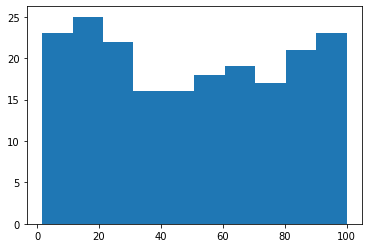

In [31]:
# Graficamos los datos generados

plt.hist(data);

No parece tan uniforme, ¿por qué? Porque tomamos muy pocas muestras, probemos con 1.000.000 de muestras

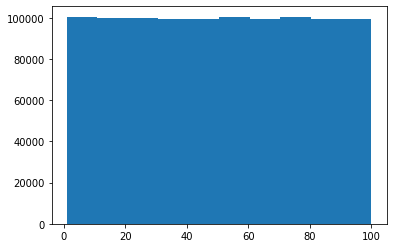

In [32]:
n = 1000000 # Cantidad de muestras a generar
data2 = np.random.uniform(a,b,n)

# Graficamos los datos generados

plt.hist(data2);

Ahora si parece una distribución uniforme !! :)

### Distribución Normal

<img src="Distribución_Normal.png">

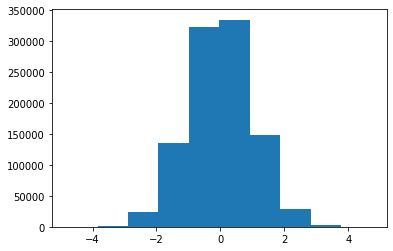

In [33]:
n = 1000000 # Cantidad de muestras a generar
data3 = np.random.randn(n) # Generador de muestras

# Graficamos los datos generados
plt.hist(data3);

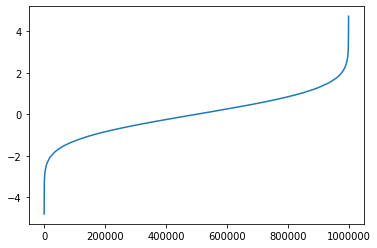

In [34]:
# Graficar la función de distribución acumulada

x = range(1, 1000001) # Generar el eje x
plt.plot(x, sorted(data3))

## La simulación de Monte Carlo

### ¿Cuál es la probabilidad de que al elijir un punto cualquiera al azar dentro del cuadrado, caiga dentro del círculo?


<img src="Montecarlo.png">

### Y bien, si multiplicamos a esta probabilidad por $4$ se puede obtener una aproximación de $\pi$

Objetivo = simular el cálculo del valor de $\pi$

Procedimiento:

1. Generamos dos números aleatorios $x$ e $y$ entre 0 y 1 (tienen que ser equiprobables)
2. Calculamos $x^2 + y^2$:
    
    2.1. Si el valor es inferior a 1 $\rightarrow$ estamos dentro del círculo. 
    
    2.2. Si el valor es superior a 1 $\rightarrow$ estamos fuera del círculo.
    

3. Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo
4. Usamos dicha probabilidad para aproximar el valor de $\pi$.
5. Repetimos el experimento un número n de veces, para obtener diferentes aproximaciones de $\pi$.
6. Calculamos el promedio de los experimentos anteriores para dar un valor final de $\pi$.

3.1376000000000017


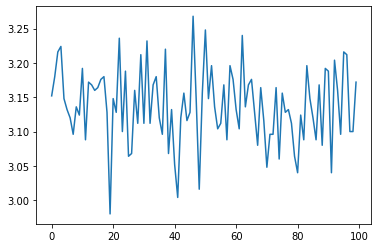

In [35]:
# Generamos una variable que guarde los valores de pi obtenidos
pi_avg = 0
n = 1000 # cantidad de muestras a generar
pi_value_list =[] # guardar los valores de pi obtenidos
m = 100 # cantidad de experimentos  realizar

for i in range(m): # Calcular el experimento m veces
    value = 0 # para guardar el número de veces que acertamos dentro del círculo
    x = np.random.uniform(0,1,n).tolist() # Valores uniformes guardados en una lista, para x
    y = np.random.uniform(0,1,n).tolist() # Valores uniformes guardados en una lista, para y
    for j in range(n): # Hacer un recorrido para obtener el valor x cuadrado más y cuadrado
        z = x[j]*x[j] + y[j]*y[j]
        if z<=1:
            value+=1 # Incrementamos en uno el número de casos favorables
    float_value = float(value)
    pi_value = float_value * 4 / n # Valor de casos favorables dividido en casos totales
    pi_value_list.append(pi_value) # Agregar a la lista un nuevo valor obtenido de pi
    pi_avg += pi_value # Acumular el valor de pi

pi = pi_avg/m # Obtener el promedio de todos los experimentos
print(pi) # Mostrar el valor de pi obtenido
plt.plot(pi_value_list) # Graficar los valores de pi obtenidos

¿Y si creamos una función que realice este experimento? Let's do it!

In [36]:
def pi_montecarlo(n=1000, n_exp=100):
    # Generamos una variable que guarde los valores de pi obtenidos
    pi_avg = 0
    pi_value_list =[] # guardar los valores de pi obtenidos
    m = n_exp # cantidad de experimentos  realizar

    for i in range(m): # Calcular el experimento m veces
        value = 0 # para guardar el número de veces que acertamos dentro del círculo
        x = np.random.uniform(0,1,n).tolist() # n Valores uniformes guardados en una lista, para x
        y = np.random.uniform(0,1,n).tolist() # n Valores uniformes guardados en una lista, para y
        for j in range(n): # Hacer un recorrido para obtener el valor x cuadrado más y cuadrado
            z = x[j]*x[j] + y[j]*y[j]
            if z<=1:
                value+=1 # Incrementamos en uno el número de casos favorables
        float_value = float(value)
        pi_value = float_value * 4 / n # Valor de casos favorables dividido en casos totales
        pi_value_list.append(pi_value) # Agregar a la lista un nuevo valor obtenido de pi
        pi_avg += pi_value # Acumular el valor de pi

    pi = pi_avg/m # Obtener el promedio de todos los experimentos
    print(pi) # Mostrar el valor de pi obtenido
    fig = plt.plot(pi_value_list) # Graficar los valores de pi obtenidos
    return (pi, fig)

3.140576


(3.140576, [<matplotlib.lines.Line2D at 0x230b6e1b898>])

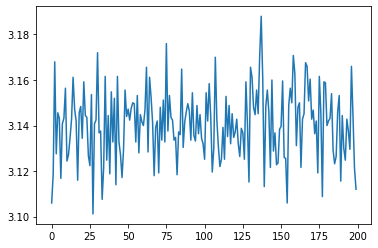

In [37]:
pi_montecarlo(10000, 200)

Sensacional!! Continuemos con la generación de data sets "dummy"

### Dummy Data sets

In [38]:
# Construyamos un dataframe con todo lo que hemos aprendido sobre distribuciones

# Cantidad de muestras
n = 1000000

data_1 = pd.DataFrame(
    {
     'A' : np.random.randn(n), # Distribución normal (0,1)
     'B' : 1.5 + 2.5*np.random.randn(n), # Distribución normal (1.5, 2.5)
     'C' : np.random.uniform(5, 32, n) # Distribución Uniforme entre 5 y 32
    } 
)
# Para todas las variables, se generó n muestras. Revisemos
data_1.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000387,1.497605,18.512680
std,1.000015,2.499402,7.797526
min,-4.827719,-10.056537,5.000075
25%,-0.673379,-0.190753,11.762609
50%,-0.000087,1.500650,18.504083
75%,0.674366,3.182166,25.271306
max,4.913072,13.713005,31.999993


(array([5.00000e+01, 1.93300e+03, 2.63880e+04, 1.47231e+05, 3.41541e+05,
        3.28130e+05, 1.31417e+05, 2.17890e+04, 1.47800e+03, 4.30000e+01]),
 array([-4.82771871, -3.85363966, -2.8795606 , -1.90548154, -0.93140249,
         0.04267657,  1.01675562,  1.99083468,  2.96491374,  3.93899279,
         4.91307185]),
 <a list of 10 Patch objects>)

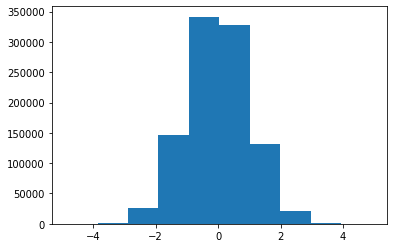

In [39]:
# Revisemos las distrbuciones

# Distribución normal (0,1)
plt.hist(data_1['A'])

(array([1.00000e+02, 3.10600e+03, 3.51070e+04, 1.68267e+05, 3.45984e+05,
        3.07824e+05, 1.18721e+05, 1.94850e+04, 1.36300e+03, 4.30000e+01]),
 array([-10.0565369 ,  -7.6795827 ,  -5.30262849,  -2.92567428,
         -0.54872008,   1.82823413,   4.20518834,   6.58214254,
          8.95909675,  11.33605096,  13.71300516]),
 <a list of 10 Patch objects>)

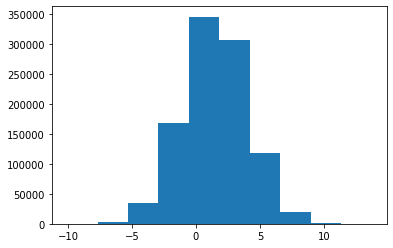

In [40]:
# Distribución normal (1.5, 2.5)
plt.hist(data_1['B'])

(array([ 99717.,  99855.,  99967., 100400.,  99924.,  99536., 100000.,
         99921.,  99904., 100776.]),
 array([ 5.00007513,  7.70006693, 10.40005873, 13.10005054, 15.80004234,
        18.50003414, 21.20002594, 23.90001775, 26.60000955, 29.30000135,
        31.99999315]),
 <a list of 10 Patch objects>)

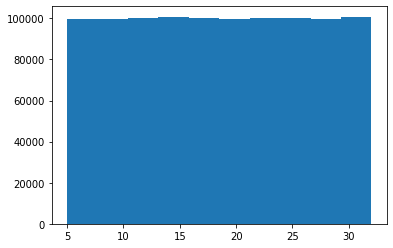

In [41]:
# Distribución Uniforme entre 5 y 32
plt.hist(data_1['C'])

In [42]:
data_2 = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')
data_2.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [43]:
colum_names = data_2.columns.values.tolist()
a = len(colum_names)
a

21

In [44]:
new_data = pd.DataFrame (
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }
)

new_data

,Column Name,A,B
0,State,0.018997,0.209223
1,Account Length,0.140282,0.711497
2,Area Code,-0.280073,0.710835
3,Phone,-0.888329,0.476497
4,Int'l Plan,2.091324,0.341038
5,VMail Plan,0.569381,0.472723
6,VMail Message,-0.605941,0.256080
7,Day Mins,0.447846,0.129207
8,Day Calls,0.699854,0.448251
9,Day Charge,0.046414,0.837945


## Dummy Data Sets con datos categóricos

In [45]:
# Generamos dos variables categóricas

gender = ['Mujer', 'Hombre']
income = ['Pobre', 'Clase media', 'Rico']

n = 500 # Cantidad de muestras

# Creamos las listas para guardar los datos aleatorios

gender_data = []
income_data = []

# Ciclo para obtener n muestras sobre nuestras variables
for i in range(0, 500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

# Revisemos los primeros 10 registros
gender_data[:10]

['Hombre',
 'Hombre',
 'Hombre',
 'Hombre',
 'Mujer',
 'Mujer',
 'Mujer',
 'Mujer',
 'Mujer',
 'Mujer']

In [46]:
# Revisemos los primeros 10 registros
income_data[:10]

['Rico',
 'Clase media',
 'Pobre',
 'Clase media',
 'Clase media',
 'Clase media',
 'Rico',
 'Rico',
 'Rico',
 'Clase media']

In [47]:
# Generamos nuevas variables, pero ahora numéricas
# Con distribuciones normales
# Z -> N(0,1)

# N(m, s) -> m + s *z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.randn(n)


In [48]:
# Creamos el dataframe

data_3 = pd.DataFrame(
    {
        'Sexo': gender_data,
        'Estado Economico': income_data,
        'Peso': weight,
        'Altura': height,
        'Edad': age,
        'Ingresos': income
    }
)

data_3.head()

,Sexo,Estado Economico,Peso,Altura,Edad,Ingresos
0,Hombre,Rico,33.346201,178.854874,45.385946,20813.470719
1,Hombre,Clase media,113.361591,141.806900,13.956049,15429.476751
2,Hombre,Pobre,61.085082,188.536748,23.820786,13117.313909
3,Hombre,Clase media,18.778331,140.283566,42.871327,17759.165610
4,Mujer,Clase media,61.181933,121.918602,13.601447,23901.455692


### Agrupación de datos

In [49]:
agrupados_sexo = data_3.groupby('Sexo')
agrupados_sexo.groups

{'Hombre': Int64Index([  0,   1,   2,   3,  11,  12,  18,  20,  21,  23,
             ...
             484, 486, 487, 488, 491, 492, 494, 496, 497, 498],
            dtype='int64', length=257),
 'Mujer': Int64Index([  4,   5,   6,   7,   8,   9,  10,  13,  14,  15,
             ...
             477, 478, 479, 480, 485, 489, 490, 493, 495, 499],
            dtype='int64', length=243)}

In [50]:
# Revisemos los datos agrupados

for nombre, grupo in agrupados_sexo:
    print(nombre)
    print(grupo)

Hombre
       Sexo Estado Economico        Peso      Altura       Edad      Ingresos
0    Hombre             Rico   33.346201  178.854874  45.385946  20813.470719
1    Hombre      Clase media  113.361591  141.806900  13.956049  15429.476751
2    Hombre            Pobre   61.085082  188.536748  23.820786  13117.313909
3    Hombre      Clase media   18.778331  140.283566  42.871327  17759.165610
11   Hombre      Clase media   75.303962  154.932648  34.281199  19046.369405
12   Hombre      Clase media   62.728649  166.651245  29.479539  17420.128140
18   Hombre      Clase media   84.737532  182.552952  38.527954  20331.740509
20   Hombre      Clase media   71.459400  145.489352  25.602147  22406.519566
21   Hombre             Rico   48.845505  171.255861  36.341825  17866.847612
23   Hombre      Clase media   79.984957  171.061312  30.883470  21461.458889
24   Hombre             Rico   69.516723  161.285463  14.448105  16987.956652
25   Hombre      Clase media   62.429489  104.401969  41.

In [51]:
# Revisar por ejemplo a las mujeres
agrupados_sexo.get_group('Mujer').head()

,Sexo,Estado Economico,Peso,Altura,Edad,Ingresos
4,Mujer,Clase media,61.181933,121.918602,13.601447,23901.455692
5,Mujer,Clase media,64.653648,202.156947,14.276626,22072.023957
6,Mujer,Rico,33.608932,149.200442,19.499976,15909.629024
7,Mujer,Rico,86.882174,176.266911,24.902984,20061.186877
8,Mujer,Rico,93.163432,176.640838,22.585424,22440.940719


In [52]:
# Agrupemos por más de una categoría

doble_agrupacion = data_3.groupby(['Sexo', 'Estado Economico'])
len(doble_agrupacion)

6

In [53]:
# Revisemos los datos agrupados

for nombre, grupo in doble_agrupacion:
    print(nombre)
    print(grupo)

('Hombre', 'Clase media')
       Sexo Estado Economico        Peso      Altura       Edad      Ingresos
1    Hombre      Clase media  113.361591  141.806900  13.956049  15429.476751
3    Hombre      Clase media   18.778331  140.283566  42.871327  17759.165610
11   Hombre      Clase media   75.303962  154.932648  34.281199  19046.369405
12   Hombre      Clase media   62.728649  166.651245  29.479539  17420.128140
18   Hombre      Clase media   84.737532  182.552952  38.527954  20331.740509
20   Hombre      Clase media   71.459400  145.489352  25.602147  22406.519566
23   Hombre      Clase media   79.984957  171.061312  30.883470  21461.458889
25   Hombre      Clase media   62.429489  104.401969  41.774141  14537.604535
27   Hombre      Clase media   58.603480  208.998805  28.943294  24312.776440
31   Hombre      Clase media   72.877127  159.872874  36.165485  18896.238479
33   Hombre      Clase media   60.016595  129.018628  23.147194  20817.312735
66   Hombre      Clase media   64.3505

## Operación sobre datos agrupados

In [54]:
doble_agrupacion.sum()

Peso        Altura         Edad      Ingresos
Sexo   Estado Economico                                                      
Hombre Clase media       5013.312283  12436.794040  2257.234591  1.455356e+06
       Pobre             5741.598002  14828.038511  2697.589791  1.586103e+06
       Rico              5372.297226  13440.993632  2683.046478  1.578362e+06
Mujer  Clase media       5236.669807  12549.745940  2455.612164  1.457918e+06
       Pobre             4681.788903  12054.681951  2132.585335  1.310266e+06
       Rico              5598.311570  13922.070760  2663.986143  1.617598e+06

In [55]:
doble_agrupacion.mean()

Peso      Altura       Edad      Ingresos
Sexo   Estado Economico                                                
Hombre Clase media       63.459649  157.427773  28.572590  18422.226299
       Pobre             62.408674  161.174332  29.321628  17240.245195
       Rico              62.468572  156.290624  31.198215  18353.048110
Mujer  Clase media       64.650245  154.935135  30.316200  17998.993417
       Pobre             65.024846  167.426138  29.619241  18198.141683
       Rico              62.203462  154.689675  29.599846  17973.311188

In [56]:
doble_agrupacion.size()

Sexo    Estado Economico
Hombre  Clase media         79
        Pobre               92
        Rico                86
Mujer   Clase media         81
        Pobre               72
        Rico                90
dtype: int64

In [57]:
doble_agrupacion.describe()

Peso                                              \
                        count       mean        std        min        25%   
Sexo   Estado Economico                                                     
Hombre Clase media       79.0  63.459649  23.902090  -5.373007  50.709618   
       Pobre             92.0  62.408674  23.941858  -0.594288  43.730873   
       Rico              86.0  62.468572  26.900411  -9.920644  46.609467   
Mujer  Clase media       81.0  64.650245  28.358615   2.971024  42.565867   
       Pobre             72.0  65.024846  29.179655 -10.591598  44.771435   
       Rico              90.0  62.203462  25.902806   8.305391  41.236919   

                                                          Altura              \
                               50%        75%         max  count        mean   
Sexo   Estado Economico                                                        
Hombre Clase media       67.281228  80.155375  113.361591   79.0  157.427773   
       Pobre             64.684014  78.052721  123.060167   92.0  161.174332   
       Rico              61.028891  82.690483  119.871572   86.0  156.290624   
Mujer  Clase media       64.653648  88.200555  130.575444   81.0  154.935135   
       Pobre             65.672876  77.007572  139.203832   72.0  167.426138   
       Rico              61.482725  82.449123  113.286186   90.0  154.689675   

                         ...       Edad            Ingresos                \
                         ...        75%        max    count          mean   
Sexo   Estado Economico  ...                                                
Hombre Clase media       ...  34.154402  61.627814     79.0  18422.226299   
       Pobre             ...  37.244284  53.335600     92.0  17240.245195   
       Rico              ...  37.461040  61.716743     86.0  18353.048110   
Mujer  Clase media       ...  38.683582  56.282319     81.0  17998.993417   
       Pobre             ...  35.492270  64.969351     72.0  18198.141683   
       Rico              ...  38.238079  61.710629     90.0  17973.311188   

                                                                  \
                                 std           min           25%   
Sexo   Estado Economico                                            
Hombre Clase media       3633.789522   8909.287626  16272.808453   
       Pobre             3696.776907   6099.473523  14407.276102   
       Rico              3440.538566  10451.648858  15861.784249   
Mujer  Clase media       3549.832838   8867.894779  15818.383084   
       Pobre             3247.672597  11225.830889  16090.978698   
       Rico              3530.933151   9722.436525  15463.126335   

                                                                   
                                  50%           75%           max  
Sexo   Estado Economico                                            
Hombre Clase media       18664.358558  20670.292177  27312.252693  
       Pobre             17390.486786  19766.556926  26278.260626  
       Rico              18581.682900  21255.120880  26768.083564  
Mujer  Clase media       17851.931866  20234.182284  27458.032466  
       Pobre             18192.175340  20148.661695  25294.664929  
       Rico              17671.063410  20447.775218  25289.762143  

[6 rows x 32 columns]

In [58]:
doble_agrupacion['Ingresos'].describe()

count          mean          std           min  \
Sexo   Estado Economico                                                   
Hombre Clase media        79.0  18422.226299  3633.789522   8909.287626   
       Pobre              92.0  17240.245195  3696.776907   6099.473523   
       Rico               86.0  18353.048110  3440.538566  10451.648858   
Mujer  Clase media        81.0  17998.993417  3549.832838   8867.894779   
       Pobre              72.0  18198.141683  3247.672597  11225.830889   
       Rico               90.0  17973.311188  3530.933151   9722.436525   

                                  25%           50%           75%  \
Sexo   Estado Economico                                             
Hombre Clase media       16272.808453  18664.358558  20670.292177   
       Pobre             14407.276102  17390.486786  19766.556926   
       Rico              15861.784249  18581.682900  21255.120880   
Mujer  Clase media       15818.383084  17851.931866  20234.182284   
       Pobre             16090.978698  18192.175340  20148.661695   
       Rico              15463.126335  17671.063410  20447.775218   

                                  max  
Sexo   Estado Economico                
Hombre Clase media       27312.252693  
       Pobre             26278.260626  
       Rico              26768.083564  
Mujer  Clase media       27458.032466  
       Pobre             25294.664929  
       Rico              25289.762143

In [59]:
doble_agrupacion.aggregate(
    {
        'Ingresos': np.sum,
        'Edad': np.mean,
        'Altura': np.std
    }
)

Ingresos       Edad     Altura
Sexo   Estado Economico                                    
Hombre Clase media       1.455356e+06  28.572590  27.826528
       Pobre             1.586103e+06  29.321628  26.983848
       Rico              1.578362e+06  31.198215  29.242582
Mujer  Clase media       1.457918e+06  30.316200  28.905208
       Pobre             1.310266e+06  29.619241  27.561274
       Rico              1.617598e+06  29.599846  31.355662

In [60]:
doble_agrupacion.aggregate(
    {
        'Edad': np.mean,
        'Altura': lambda h: np.mean(h)/np.std(h)
    }
)

Edad    Altura
Sexo   Estado Economico                     
Hombre Clase media       28.572590  5.693621
       Pobre             29.321628  6.005722
       Rico              31.198215  5.375972
Mujer  Clase media       30.316200  5.393508
       Pobre             29.619241  6.117318
       Rico              29.599846  4.961027

In [61]:
doble_agrupacion.aggregate([np.sum, np.mean, np.std])

Peso                              Altura  \
                                 sum       mean        std           sum   
Sexo   Estado Economico                                                    
Hombre Clase media       5013.312283  63.459649  23.902090  12436.794040   
       Pobre             5741.598002  62.408674  23.941858  14828.038511   
       Rico              5372.297226  62.468572  26.900411  13440.993632   
Mujer  Clase media       5236.669807  64.650245  28.358615  12549.745940   
       Pobre             4681.788903  65.024846  29.179655  12054.681951   
       Rico              5598.311570  62.203462  25.902806  13922.070760   

                                                       Edad             \
                               mean        std          sum       mean   
Sexo   Estado Economico                                                  
Hombre Clase media       157.427773  27.826528  2257.234591  28.572590   
       Pobre             161.174332  26.983848  2697.589791  29.321628   
       Rico              156.290624  29.242582  2683.046478  31.198215   
Mujer  Clase media       154.935135  28.905208  2455.612164  30.316200   
       Pobre             167.426138  27.561274  2132.585335  29.619241   
       Rico              154.689675  31.355662  2663.986143  29.599846   

                                        Ingresos                             
                               std           sum          mean          std  
Sexo   Estado Economico                                                      
Hombre Clase media       10.887438  1.455356e+06  18422.226299  3633.789522  
       Pobre             11.085650  1.586103e+06  17240.245195  3696.776907  
       Rico              11.365471  1.578362e+06  18353.048110  3440.538566  
Mujer  Clase media       11.803545  1.457918e+06  17998.993417  3549.832838  
       Pobre             12.312163  1.310266e+06  18198.141683  3247.672597  
       Rico              12.935859  1.617598e+06  17973.311188  3530.933151

In [62]:
doble_agrupacion.aggregate([lambda x: np.mean(x) / np.std(x)])

Peso    Altura      Edad  Ingresos
                         <lambda>  <lambda>  <lambda>  <lambda>
Sexo   Estado Economico                                        
Hombre Clase media       2.671948  5.693621  2.641132  5.102096
       Pobre             2.620960  6.005722  2.659501  4.689142
       Rico              2.335836  5.375972  2.761100  5.365640
Mujer  Clase media       2.293943  5.393508  2.584400  5.101969
       Pobre             2.244069  6.117318  2.422572  5.642764
       Rico              2.414871  4.961027  2.301020  5.118761

## Transformación de datos

In [63]:
## Zscore

zscore = lambda x: (x-x.mean())/x.std() # A cada valore le quito el valor premio y divido por su desviación típica.

In [64]:
doble_agrupacion.transform(zscore).head()

,Peso,Altura,Edad,Ingresos
0,-1.082599,0.771623,1.248319,0.715127
1,2.087765,-0.561366,-1.342514,-0.823589
2,-0.055284,1.014029,-0.496213,-1.115277
3,-1.869348,-0.616110,1.313324,-0.182471
4,-0.122302,-1.142235,-1.416079,1.662744


In [65]:
## Con valores perdidos

fill_na_mean = lambda x : x.fillna(x.mean())
doble_agrupacion.transform(fill_na_mean).head()

,Peso,Altura,Edad,Ingresos
0,33.346201,178.854874,45.385946,20813.470719
1,113.361591,141.806900,13.956049,15429.476751
2,61.085082,188.536748,23.820786,13117.313909
3,18.778331,140.283566,42.871327,17759.165610
4,61.181933,121.918602,13.601447,23901.455692


## Operaciones diversas y útiles

In [66]:
## Primera fila de cada grupo
doble_agrupacion.head(1)

,Sexo,Estado Economico,Peso,Altura,Edad,Ingresos
0,Hombre,Rico,33.346201,178.854874,45.385946,20813.470719
1,Hombre,Clase media,113.361591,141.806900,13.956049,15429.476751
2,Hombre,Pobre,61.085082,188.536748,23.820786,13117.313909
4,Mujer,Clase media,61.181933,121.918602,13.601447,23901.455692
6,Mujer,Rico,33.608932,149.200442,19.499976,15909.629024
10,Mujer,Pobre,-10.591598,164.383082,32.754846,16986.821945


In [67]:
## Última fila de cada grupo
doble_agrupacion.tail(1)

,Sexo,Estado Economico,Peso,Altura,Edad,Ingresos
489,Mujer,Clase media,75.076798,208.668954,33.940396,13341.673461
492,Hombre,Pobre,84.575073,184.811158,34.008297,14011.828009
495,Mujer,Rico,41.865146,137.059163,20.238401,21707.185946
497,Hombre,Rico,68.628059,134.685613,27.459753,22361.539315
498,Hombre,Clase media,20.073167,159.974501,26.578268,18438.432852
499,Mujer,Pobre,32.392374,159.457208,37.390841,20971.174066


In [68]:
## n-ésima fila de cada grupo
n = 32
doble_agrupacion.nth(n)

Peso      Altura       Edad      Ingresos
Sexo   Estado Economico                                                 
Hombre Clase media        81.334896  208.016617  27.813146  18749.311183
       Pobre              37.061894  147.210041  38.761118  18044.235768
       Rico               40.995727  172.776297  30.073019  26768.083564
Mujer  Clase media       112.710087  180.991135  14.704474  17113.816865
       Pobre              50.861898  171.424717  29.145658  14728.658398
       Rico               21.677604  166.956600  42.844271  20526.553283

In [69]:
## n-ésima fila de cada grupo
n = 84
doble_agrupacion.nth(n)

Peso      Altura       Edad      Ingresos
Sexo   Estado Economico                                                
Hombre Pobre             76.368381  157.970215  21.940201  23526.498047
       Rico              54.667400  170.864904  26.502169  18674.708651
Mujer  Rico              86.700874  199.352994  44.115582  13951.983880

¿Qué ocurrió con las demás clasificaciones? No se muestran porque existen menos de 84 registros para esas categorías.

In [70]:
data_3.head()

,Sexo,Estado Economico,Peso,Altura,Edad,Ingresos
0,Hombre,Rico,33.346201,178.854874,45.385946,20813.470719
1,Hombre,Clase media,113.361591,141.806900,13.956049,15429.476751
2,Hombre,Pobre,61.085082,188.536748,23.820786,13117.313909
3,Hombre,Clase media,18.778331,140.283566,42.871327,17759.165610
4,Mujer,Clase media,61.181933,121.918602,13.601447,23901.455692


## Conjuntos de entrenamiento y testing

Para realizar un modelo predictivo de Machine Learning, un dataset en general se divide en un subconjunto de entrenamiento y otro de testing.

- El conjunto de entrenamiento (generalmente el 75% del dataset original) es para construir el modelo.

        - El modelo tiende ajustarse muy bien con respecto a este conjunto de entrenamiento (overfitting)
        
- El conjunto de testing (generalmente el 25% del dataset original) se utiliza para comprobar la eficacia de dicho modelo.

El método más efectivo para crear estos subconjuntos, es elegir de forma aleatoria del dataset original!


### Dividir utilizando la distribución normal

In [71]:
data = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/customer-churn-model/Customer Churn Model.txt')
len(data)

3333

(array([  6.,  35., 151., 431., 763., 876., 629., 327.,  94.,  21.]),
 array([-3.63962874, -2.95716081, -2.27469288, -1.59222495, -0.90975702,
        -0.22728909,  0.45517884,  1.13764677,  1.82011469,  2.50258262,
         3.18505055]),
 <a list of 10 Patch objects>)

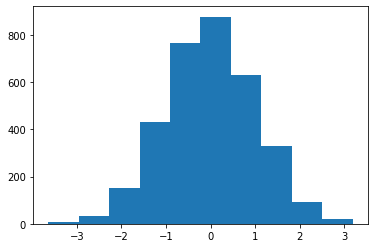

In [72]:
a = np.random.randn(len(data))
plt.hist(a)

In [73]:
## Generamos una condición para obtener un punto de corte entre los conjuntos

check = (a<0.8)
check

array([ True,  True, False, ...,  True,  True,  True])

<BarContainer object of 3333 artists>

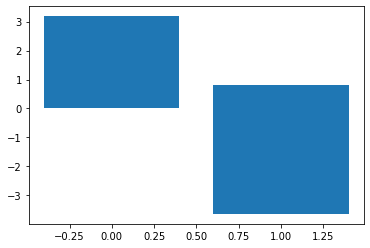

In [74]:
#Revisemos gráficamente los conjuntos de datos que se pueden generar
plt.bar(check, a)

In [75]:
# Dividimos la muestra
training = data[check]
testing = data[~check]
print(len(training), len(testing))

2636 697


### Con la librería sklearn

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Es muy sencillo con esta librería

train, test = train_test_split(data, test_size=0.2)

In [78]:
print(len(train), len(test))

2666 667


### Usando una función de shuffle

In [79]:
# Desde sklearn
import sklearn

In [80]:
# Ordenar de forma aleatoria el dataset
data = sklearn.utils.shuffle(data)

In [81]:
# Hacer la división
pje_corte = int(0.75*len(data))
train_data = data[:pje_corte]
test_data = data[pje_corte+1:]

In [82]:
print(len(train_data), len(test_data))

2499 833


## Concatenar y apendizar data sets

¿Qué ocurre cuando tienes los datasets separados, con los mismos atributos?

In [83]:
red_wine = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/wine/winequality-red.csv', sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [84]:
red_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [85]:
red_wine.shape

(1599, 12)

In [86]:
white_wine = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/wine/winequality-white.csv', sep=';')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [87]:
white_wine.shape

(4898, 12)

En python, tenemos dos tipos de ejes:
* axis = 0 denota el eje horizontal (filas)
* axis = 1 denota el eje vertical (columnas)

Para este caso, donde tenemos la misma cantidad de columnas y en el mismo orden, entonces juntaremos ambos datasets de forma horizontal, es decir, agregaremos las filas de ambos datasets

In [88]:
## El ´termino es "apilar", donde primero pondremos el data set red_wine y le agregaremos el data set  white_wine
wine_data = pd.concat([red_wine, white_wine], axis=0)
wine_data.shape

(6497, 12)

In [89]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## ¿Qué ocurre cuando tienes cientos datos distribuidos? ¿Cómo se unen?

Este es el caso cuando tenemos registros por día de algún sistema o medición en particular. 

En este caso tenemos cerca de 300 bases con respecto a los niveles de contaminación.

In [90]:
# Primero revisemos la data que tiene

data = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/distributed-data/001.csv')
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [91]:
data.shape

(1461, 4)

Procedimiento:

1. Importar el primer fichero (base)
2. Realizar un bucle/ciclo para ir recorriendo todos y cada uno de los ficheros
    * Importante tener una consistencia en el nombre de los ficheros
    * Importamos los ficheros uno a uno
    * Cada uno de ellos debe apendizarse (añadirse al final) del primer fichero que ya habíamos cargado
3. Repetimos el bucle hasta que queden ficheros

In [92]:
filepath = '/Users/fsanmartin/python-ml-course-master/datasets/distributed-data/'

data = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/distributed-data/001.csv')

for i in range(2, 333):
    if i < 10:
        filename = '00'+str(i)
    elif i >= 10 and i < 100:
        filename = '0' + str(i)
    else:
        filename = str(i)
        
    file = filepath + filename + '.csv'
    
    temp_data = pd.read_csv(file)
    
    data = pd.concat([data, temp_data], axis=0)


In [93]:
# Revisemos la información
data.shape

(772087, 4)

## Joins de datasets

El caso en que tenemos "n" tablas, donde se unen a través de algún identificador (primary key). Es decir, una base de datos relacional.

En el caso de python, se unen datasets*

In [94]:
#Este dataset tiene un detalle con la codificación (generalmente se utiliza utf-8)
data_main = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/athletes/Medals.csv', encoding='ISO-8859-1')
data_main.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [95]:
# Revisemos los atletas únicos

a = data_main['Athlete'].unique().tolist()
len(a)

6956

In [96]:
data_main.shape

(8618, 8)

In [97]:
# Obtenemos la base con los países asociados a los atletas

data_country = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/athletes/Athelete_Country_Map.csv', encoding='ISO-8859-1')

In [98]:
data_country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


En este caso, tenemos dos bases con informaciones distintas, pero con los atletas en común.

Revisemos que tengamos la misma cantidad de registros

In [99]:
data_country.shape[0]

6970

In [100]:
len(a)

6956

¿Por qué existen más registros en la segunda tabla? Quizás puede ser que un mismo atleta olímpico haya jugado para dos países diferentes a lo largo de la historia y además haya ganado medallas. En un caso en concreto, puede ser que un país haya cambiado de nombre (por ejemplo, la división de Yugoslavia en nuevos países)

In [101]:
data_country['Athlete'].value_counts().head(10)

David Musulbes      2
Vanja Udovicic      2
Gyuzel Manyurova    2
Slobodan Nikic      2
Chen Jing           2
Iván García         2
Dejan Savic         2
Richard Thompson    2
Aleksandar apic    2
Matt Wells          2
Name: Athlete, dtype: int64

Como comprobamos, existen atletas que han participado representando distintos países.

Por último, tenemos una base que asocia el atleta con su deporte

In [102]:
data_sports = pd.read_csv('/Users/fsanmartin/python-ml-course-master/datasets/athletes/Athelete_Sports_Map.csv', encoding='ISO-8859-1')

In [103]:
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [104]:
data_sports.shape

(6975, 2)

Aquí también, tenemos más registros. Esto quiere decir que un mismo atleta pudo haber participado a 2 deportes olímpicos.

In [105]:
data_sports['Athlete'].value_counts().head(10)

Chen Jing           2
Matt Ryan           2
Li Ting             2
Matt Wells          2
Ryan Bailey         2
Jang Seong-Ho       2
Richard Thompson    2
Yang Wei            2
Kim Nam-Sun         2
Nataliya Ivanova    2
Name: Athlete, dtype: int64

## ¿Y cómo unimos estos 3 datasets?

En este caso, tenemos la columna Athlete como punto en compun de los data sets. Lo hacemos con "merge"

In [106]:
# Separamos el campo de unión
key = 'Athlete'
data_main_country = pd.merge(left = data_main, right = data_country,
                            left_on=key, right_on = key)

In [107]:
data_main_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


¿Y qué ocurrió con la dimensión del dataframe? Lo que se utilizó, es una técnica "innerjoin" donde se hace la combinación de ambos datasets, por lo tanto si un mismo atleta se relaciona con más de un país, entonces se crearán registros para cada país con los mismos resultados obtenidos en el mismo año.

In [108]:
data_main_country.shape

(8657, 9)

¿Qué hacemos entonces? Se recomienda tener una relación uno a uno, en este caso, cada atleta se relacione con un solo país. Por lo tanto se procederá a eliminar los registros duplicados de la base que relaciona el atleta con su país.

In [109]:
data_country_dp = data_country.drop_duplicates(subset='Athlete')

In [110]:
data_main_country_dp = pd.merge(left = data_main, right = data_country_dp,
                            left_on=key, right_on = key)

In [111]:
data_main_country_dp.shape

(8618, 9)

De esta forma corregimos el problema de los registros duplicados. 

Para la base que relaciona el deporte con el atleta, debemos hacer lo mismo.

In [112]:
data_sports_dp = data_sports.drop_duplicates(subset='Athlete')

In [113]:
data_final = pd.merge(left = data_main_country_dp, right = data_sports_dp,
                            left_on=key, right_on = key)


In [114]:
data_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


Enhorabuena !! Hemos juntados 3 datasets con un campo en común.

# Tipos de Joins (Uniones) teoría

In [115]:
from IPython.display import Image

## Inner Join


* Devuelve un data frame con las filas que tienen valor tanto en el primero como en el segundo data frame que estamos uniendo
* El número de filas será igual al número de filas comunes que tengan ambos data sets
    * Data Set A tiene 60 gilas
    * Data Set B tiene 50 filas
    * Ambos comparte 30 filas
    * Entonces A Inner Join B tendrá 30 filas
* En términos de teoría de conjuntos, se trata de la intersección de los dos conjuntos

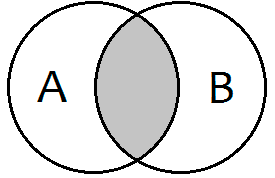

In [116]:
Image(filename='/Users/fsanmartin/python-ml-course-master/notebooks/resources/inner-join.png')

## Left Join


* Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, sin importar si tienen correspondencia en el de la derecha o no
* Las filas del data frame final que no corresponden a ninguna fila del data frame derecho, tendrán NA's en las columnas del data frame derecho
* El número de filas será igual al número de filas del data frame izquierdo
    * Data Set A tiene 60 gilas
    * Data Set B tiene 50 filas
    * Entonces A Left Join B tendrá 60 filas
* En términos de teoría de conjuntos, se trata del propio data set de la izquierda quien, además tiene la intersección en su interior

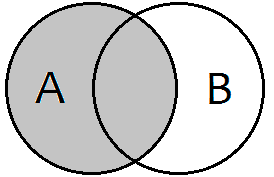

In [117]:
Image(filename='/Users/fsanmartin/python-ml-course-master/notebooks/resources/left-join.png')

## Right Join


* Devuelve un data frame con las filas que tuvieran valor en el dataset de la derecha, sin importar si tienen correspondencia en el de la izquierda o no
* Las filas del data frame final que no corresponden a ninguna fila del data frame izquierdo, tendrán NA's en las columnas del data frame izquierdo
* El número de filas será igual al número de filas del data frame derecho
    * Data Set A tiene 60 gilas
    * Data Set B tiene 50 filas
    * Entonces A Right Join B tendrá 50 filas
* En términos de teoría de conjuntos, se trata del propio data set de la derecha quien, además tiene la intersección en su interior

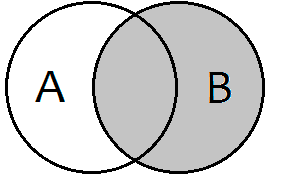

In [118]:
Image(filename='/Users/fsanmartin/python-ml-course-master/notebooks/resources/right-join.png')

## Outer Join (full)


* Devuelve un data frame con las filas de ambos, reemplazando las ausencias de uno o de otro con NA's en la región específica.
* Las filas del data frame final que no corresponden a ninguna fila del data frame izquierdo (o derecho), tendrán NA's en las columnas del data frame izquierdo (o derecho)
* El número de filas será igual al máximo número de filas de ambos data frames
    * Data Set A tiene 60 gilas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Outer Join B tendrá 60 + 50 - 30 = 80 filas
* En términos de teoría de conjuntos, se trata de una unión de conjuntos

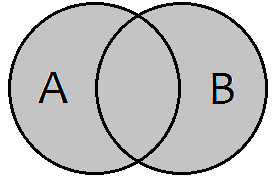

In [119]:
Image(filename='/Users/fsanmartin/python-ml-course-master/notebooks/resources/outer-join.png')